In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the CSV file and convertin it into a Data Frame
df = pd.read_csv("Downloads/diabetes.csv")

In [27]:
#Printing the top 5 rows of the dataframe
df.head(5)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [4]:
# Checking the null values
null_values = df.isnull().sum()

In [5]:
# Display the count of null values for each column
print(null_values)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [6]:
# When you call df.describe(), it computes summary statistics of the numerical columns in the DataFrame.
#These statistics include count, mean, standard deviation, minimum, maximum, and various quantiles 
#(25th, 50th, and 75th percentiles).

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
#Replacing the zeros with their mean values 

df['BMI']=df['BMI'].replace(0, df['BMI'].mean())
df['Insulin']=df['Insulin'].replace(0, df['Insulin'].mean())
df['Glucose']=df['Glucose'].replace(0, df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0, df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0, df['SkinThickness'].mean())


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
# Set Seaborn style
sns.set_style('whitegrid')

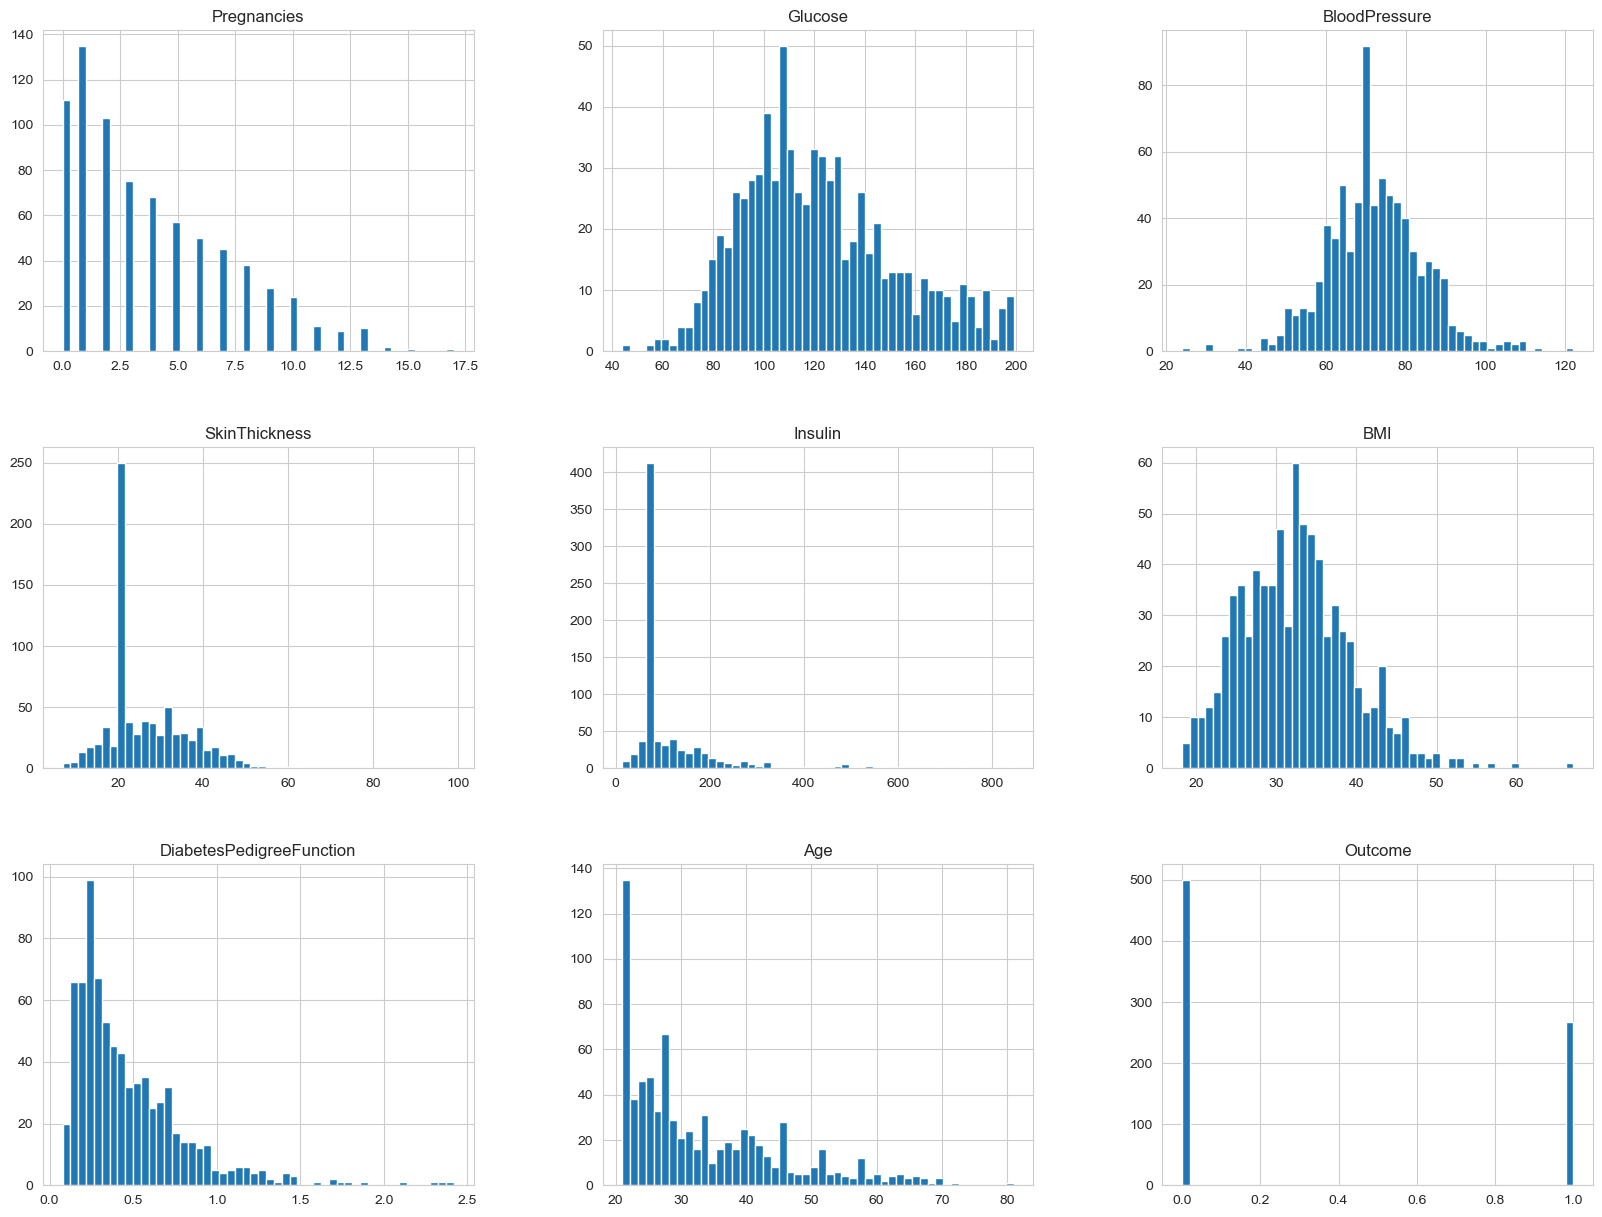

In [10]:
# Ploting density plot for all features
df.hist(bins=50, figsize=(20, 15))
plt.show()


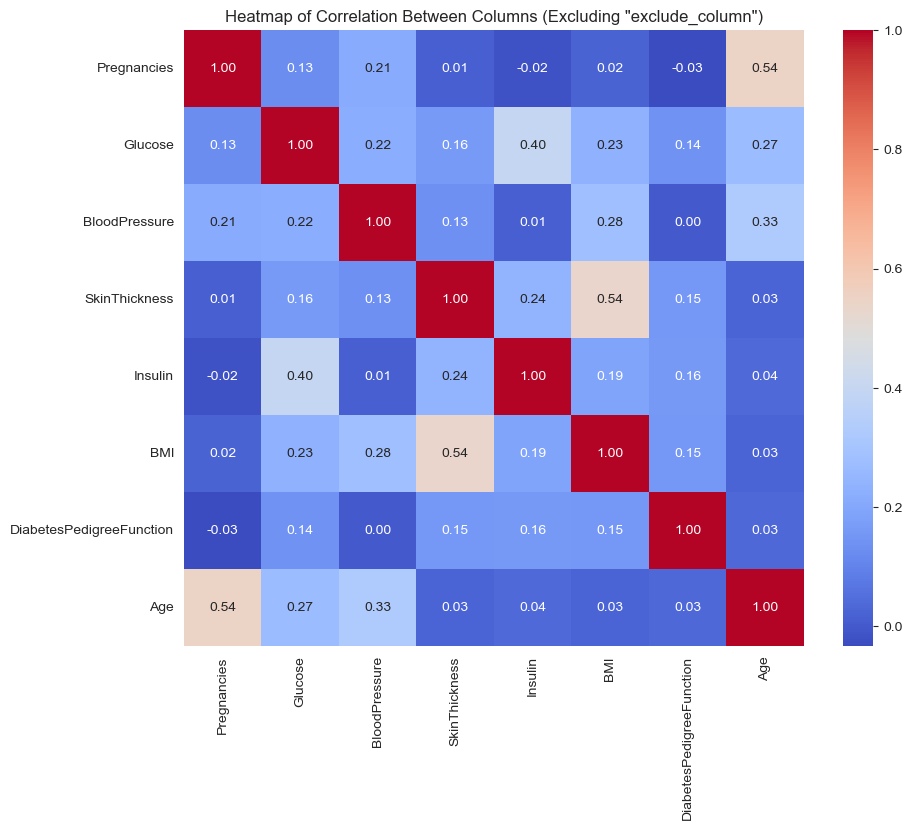

In [11]:
columns_to_include = df.drop(columns=['Outcome']) 

# Ploting heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(columns_to_include.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Between Columns (Excluding "exclude_column")')
plt.show()

<Axes: >

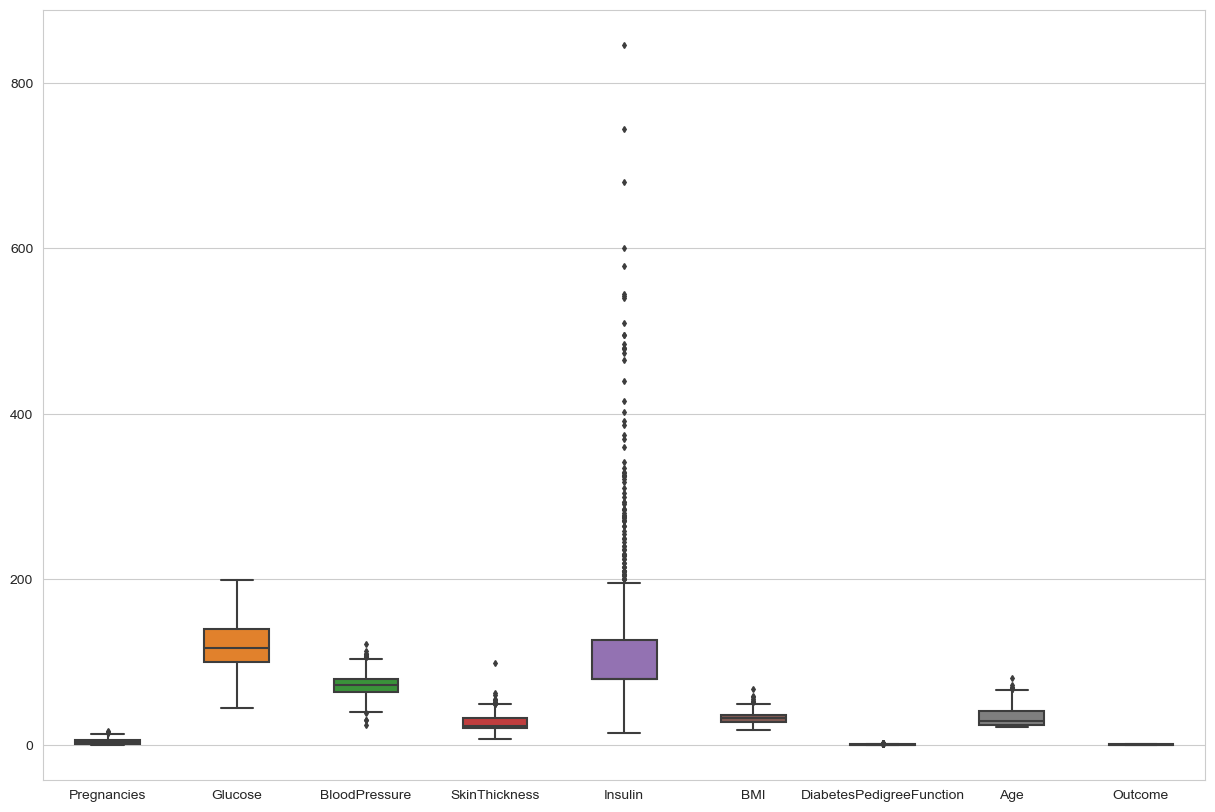

In [12]:
fig, ax =plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width=0.5, ax=ax, fliersize=3)

In [13]:

#Splitting the data into X(Input Variable) and y(Output Variable)
X=df.drop(columns= ['Outcome'])
y=df['Outcome']

In [14]:

# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
np.size(y_test)

154

In [16]:
# Initialize the logistic regression model
lr = LogisticRegression()

In [17]:
# In[19]:


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
# Fit the model on the training data
lr.fit(X_train_scaled, y_train)

LogisticRegression()

In [19]:
# Make predictions on the testing data
predictions = lr.predict(X_test_scaled)

In [20]:
# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)


Accuracy: 0.7662337662337663
Precision: 0.6862745098039216
Recall: 0.6363636363636364
F1 Score: 0.660377358490566
ROC AUC Score: 0.7373737373737373


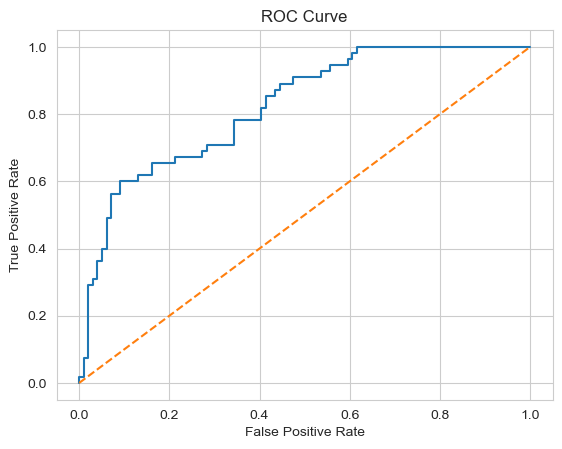

In [21]:
# Plot ROC curve
y_prob = lr.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [22]:
# In[39]:


coefficients = lr.coef_
intercept = lr.intercept_

print("Intercept:", intercept)
print("Coefficients:", coefficients)

Intercept: [-0.87387862]
Coefficients: [[ 0.22192395  1.12487346 -0.16824905  0.01648627 -0.18588227  0.7313578
   0.21171528  0.39300256]]


In [24]:
import pickle
    
with open('log_reg_model.pkl', 'wb') as file:
    pickle.dump((scaler, lr), file)

In [30]:
with open('pic_test.pkl', 'wb') as file:
    pickle.dump(y_test, file)